### makemore: lect02

### day02
- 202403010815-202403010830
- 202403011945-202403012100
- 2024030120000-202403012300

### day03
- 202403020800-202403021500
- 202403021830-202403022100

### day03
- 202403030915-2024030301100

### day04
- 202403040830-202403041030

### Pointers:

Eric Z Yang’s blog:

- http://blog.ezyang.com/

- Tensor Strided Representation

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("./names.txt").read().splitlines()

In [3]:
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set("".join(words))))
chars[:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [6]:
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [7]:
# stoi
# itos

In [8]:
### build data sets

block_size = 3
X, Y = [], []

for word in words[:5]:
    context = [0] * block_size
    print(word)
    
    for ch in word + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [11]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [12]:
C = torch.randn((27, 2))

In [13]:
C

tensor([[ 1.7465, -0.3896],
        [ 0.6227, -1.0577],
        [-1.6013,  0.0827],
        [ 1.3279,  0.9117],
        [ 0.5340, -0.5548],
        [-0.7151, -0.5364],
        [ 0.1622, -0.8449],
        [-2.7711,  1.7013],
        [ 0.0989, -0.2410],
        [ 0.6946,  0.1982],
        [-1.6111, -0.2175],
        [-1.4259, -0.5320],
        [-0.5587,  0.0063],
        [ 0.5683, -0.2321],
        [-0.7253, -0.6925],
        [-1.0097,  1.6322],
        [ 2.0179, -1.5161],
        [-0.1115,  0.8214],
        [ 0.0414, -0.2137],
        [-0.0615,  0.2591],
        [-0.5729, -0.3723],
        [ 1.4200,  0.4178],
        [-1.2668,  2.3340],
        [-0.3942, -0.2050],
        [-0.0342,  0.4811],
        [ 0.3788, -0.9994],
        [-0.0034,  0.6523]])

In [14]:
C[5]

tensor([-0.7151, -0.5364])

In [15]:
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
F.one_hot(torch.tensor(5), num_classes=27).shape

torch.Size([27])

In [17]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.7151, -0.5364])

In [18]:
C[[5, 6, 7]]

tensor([[-0.7151, -0.5364],
        [ 0.1622, -0.8449],
        [-2.7711,  1.7013]])

In [19]:
C[6]

tensor([ 0.1622, -0.8449])

In [20]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[-0.7151, -0.5364],
        [ 0.1622, -0.8449],
        [-2.7711,  1.7013],
        [-2.7711,  1.7013],
        [-2.7711,  1.7013],
        [-2.7711,  1.7013]])

In [21]:
X[13]

tensor([0, 0, 1])

In [22]:
X[13, 2]

tensor(1)

In [23]:
X[13][2]

tensor(1)

In [24]:
C[X]

tensor([[[ 1.7465, -0.3896],
         [ 1.7465, -0.3896],
         [ 1.7465, -0.3896]],

        [[ 1.7465, -0.3896],
         [ 1.7465, -0.3896],
         [-0.7151, -0.5364]],

        [[ 1.7465, -0.3896],
         [-0.7151, -0.5364],
         [ 0.5683, -0.2321]],

        [[-0.7151, -0.5364],
         [ 0.5683, -0.2321],
         [ 0.5683, -0.2321]],

        [[ 0.5683, -0.2321],
         [ 0.5683, -0.2321],
         [ 0.6227, -1.0577]],

        [[ 1.7465, -0.3896],
         [ 1.7465, -0.3896],
         [ 1.7465, -0.3896]],

        [[ 1.7465, -0.3896],
         [ 1.7465, -0.3896],
         [-1.0097,  1.6322]],

        [[ 1.7465, -0.3896],
         [-1.0097,  1.6322],
         [-0.5587,  0.0063]],

        [[-1.0097,  1.6322],
         [-0.5587,  0.0063],
         [ 0.6946,  0.1982]],

        [[-0.5587,  0.0063],
         [ 0.6946,  0.1982],
         [-1.2668,  2.3340]],

        [[ 0.6946,  0.1982],
         [-1.2668,  2.3340],
         [ 0.6946,  0.1982]],

        [[-1.2668,  2

In [25]:
C[X][2]

tensor([[ 1.7465, -0.3896],
        [-0.7151, -0.5364],
        [ 0.5683, -0.2321]])

In [26]:
X[2]

tensor([ 0,  5, 13])

In [27]:
C[0], C[5], C[13]

(tensor([ 1.7465, -0.3896]),
 tensor([-0.7151, -0.5364]),
 tensor([ 0.5683, -0.2321]))

In [28]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [29]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [30]:
# emb @ W1
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)


In [31]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [32]:
torch.cat(torch.unbind(emb, 1), dim=1).shape

torch.Size([32, 6])

In [33]:
torch.cat(torch.unbind(emb, 1), dim=1)

tensor([[ 1.7465, -0.3896,  1.7465, -0.3896,  1.7465, -0.3896],
        [ 1.7465, -0.3896,  1.7465, -0.3896, -0.7151, -0.5364],
        [ 1.7465, -0.3896, -0.7151, -0.5364,  0.5683, -0.2321],
        [-0.7151, -0.5364,  0.5683, -0.2321,  0.5683, -0.2321],
        [ 0.5683, -0.2321,  0.5683, -0.2321,  0.6227, -1.0577],
        [ 1.7465, -0.3896,  1.7465, -0.3896,  1.7465, -0.3896],
        [ 1.7465, -0.3896,  1.7465, -0.3896, -1.0097,  1.6322],
        [ 1.7465, -0.3896, -1.0097,  1.6322, -0.5587,  0.0063],
        [-1.0097,  1.6322, -0.5587,  0.0063,  0.6946,  0.1982],
        [-0.5587,  0.0063,  0.6946,  0.1982, -1.2668,  2.3340],
        [ 0.6946,  0.1982, -1.2668,  2.3340,  0.6946,  0.1982],
        [-1.2668,  2.3340,  0.6946,  0.1982,  0.6227, -1.0577],
        [ 1.7465, -0.3896,  1.7465, -0.3896,  1.7465, -0.3896],
        [ 1.7465, -0.3896,  1.7465, -0.3896,  0.6227, -1.0577],
        [ 1.7465, -0.3896,  0.6227, -1.0577, -1.2668,  2.3340],
        [ 0.6227, -1.0577, -1.2668,  2.3

In [34]:
h = emb.view(32, 6) @ W1 + b1
h

tensor([[ 0.1154,  1.9549,  6.4564,  ..., -4.3977, -0.5030, -1.8986],
        [ 0.9272,  0.8588,  5.2316,  ..., -3.8168, -3.3739, -4.6829],
        [ 3.4755, -0.1925,  1.9612,  ..., -0.7664, -1.3650, -1.1842],
        ...,
        [-4.1014, -1.0934,  1.8183,  ...,  0.4153, -1.9746, -4.2235],
        [ 3.6427,  0.6757,  4.5361,  ..., -2.3449, -0.8015, -1.3734],
        [-1.0165,  0.4205,  3.5980,  ..., -0.4254, -0.0694, -1.5795]])

In [35]:
h = emb.view(-1, 6) @ W1 + b1
h

tensor([[ 0.1154,  1.9549,  6.4564,  ..., -4.3977, -0.5030, -1.8986],
        [ 0.9272,  0.8588,  5.2316,  ..., -3.8168, -3.3739, -4.6829],
        [ 3.4755, -0.1925,  1.9612,  ..., -0.7664, -1.3650, -1.1842],
        ...,
        [-4.1014, -1.0934,  1.8183,  ...,  0.4153, -1.9746, -4.2235],
        [ 3.6427,  0.6757,  4.5361,  ..., -2.3449, -0.8015, -1.3734],
        [-1.0165,  0.4205,  3.5980,  ..., -0.4254, -0.0694, -1.5795]])

In [36]:
h.shape

torch.Size([32, 100])

In [37]:
h = torch.tanh(h)

In [38]:
h

tensor([[ 0.1149,  0.9607,  1.0000,  ..., -0.9997, -0.4645, -0.9561],
        [ 0.7293,  0.6956,  0.9999,  ..., -0.9990, -0.9977, -0.9998],
        [ 0.9981, -0.1902,  0.9612,  ..., -0.6449, -0.8776, -0.8288],
        ...,
        [-0.9995, -0.7981,  0.9487,  ...,  0.3929, -0.9622, -0.9996],
        [ 0.9986,  0.5887,  0.9998,  ..., -0.9818, -0.6649, -0.8795],
        [-0.7684,  0.3973,  0.9985,  ..., -0.4015, -0.0693, -0.9185]])

In [39]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [40]:
logits = h @ W2 + b2
logits

tensor([[ 5.9742e+00, -3.2655e+00, -1.6340e+00,  3.9365e+00, -5.4207e+00,
         -6.2760e+00, -2.4370e+01,  1.0437e+01, -1.4458e+00,  3.4679e+00,
          1.0944e+01, -2.6476e-01,  6.9427e+00, -1.4412e+01, -1.0724e+01,
         -2.9506e+00,  1.6190e+00,  5.8884e+00, -1.4453e+00,  1.9987e+00,
          3.5167e+00,  7.3111e+00, -1.9124e+00, -9.4886e+00,  7.8436e+00,
         -1.1577e+01,  1.0039e+01],
        [ 1.4922e+00, -1.1884e+01, -3.0677e+00,  3.6784e+00, -7.9000e+00,
         -8.1305e+00, -2.1579e+00,  8.3114e+00,  2.6587e+00, -5.2306e-01,
         -1.3136e+00,  9.3665e+00,  1.7540e+01,  2.1965e+00, -1.9953e+00,
          4.6399e+00, -7.2229e+00,  8.8625e+00,  3.3497e+00,  3.0436e+00,
          4.8388e-01,  4.4328e+00, -4.8798e+00, -6.5109e+00, -6.9301e-01,
          4.8761e+00,  1.8181e+00],
        [ 7.3088e-01, -3.6069e+00, -1.1325e+01, -2.9034e-01,  1.0996e+00,
          1.7247e+00, -2.4332e+00,  2.8786e+00, -1.4650e+01,  3.9964e+00,
         -2.5853e-01,  6.9310e+00, -2.54

In [41]:
logits.shape

torch.Size([32, 27])

In [42]:
counts = logits.exp()

In [43]:
counts.sum(dim=0)

tensor([1.1417e+04, 3.5216e+07, 8.6934e+09, 9.2440e+03, 8.4081e+02, 2.2320e+06,
        2.8079e+04, 1.8611e+06, 7.2694e+05, 1.3344e+05, 8.6969e+06, 2.0618e+08,
        1.0397e+10, 2.2191e+06, 5.0204e+03, 3.5686e+05, 2.2778e+02, 2.4809e+05,
        5.7531e+06, 3.1455e+04, 2.8887e+05, 1.2980e+07, 2.3117e+03, 4.6567e+04,
        2.2078e+04, 1.8042e+06, 1.3359e+08])

In [44]:
# counts.sum(dim=1)

In [45]:
probs = counts / counts.sum(dim=1, keepdim=True)

In [46]:
probs.shape

torch.Size([32, 27])

In [47]:
probs[0]

tensor([3.2870e-03, 3.1920e-07, 1.6316e-06, 4.2840e-04, 3.6987e-08, 1.5726e-08,
        2.1795e-16, 2.8508e-01, 1.9694e-06, 2.6812e-04, 4.7352e-01, 6.4160e-06,
        8.6581e-03, 4.6060e-12, 1.8408e-10, 4.3735e-07, 4.2207e-05, 3.0169e-03,
        1.9705e-06, 6.1699e-05, 2.8153e-04, 1.2514e-02, 1.2351e-06, 6.3298e-10,
        2.1314e-02, 7.8431e-11, 1.9151e-01])

In [48]:
probs[0].sum(), probs[1].sum(), probs[2].sum()

(tensor(1.), tensor(1.0000), tensor(1.))

In [49]:
a = torch.tensor([[1, 2, 5], [4, 5, 1]])

In [50]:
a

tensor([[1, 2, 5],
        [4, 5, 1]])

In [51]:
a.shape

torch.Size([2, 3])

In [52]:
a.sum(dim=0)

tensor([5, 7, 6])

In [53]:
a.sum(dim=1)

tensor([ 8, 10])

In [54]:
a.sum(dim=1, keepdim=True)

tensor([[ 8],
        [10]])

In [55]:
a / a.sum(dim=0)

tensor([[0.2000, 0.2857, 0.8333],
        [0.8000, 0.7143, 0.1667]])

In [56]:
a / a.sum(dim=1, keepdim=True)

tensor([[0.1250, 0.2500, 0.6250],
        [0.4000, 0.5000, 0.1000]])

In [57]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [58]:
probs[torch.arange(32), Y].shape

torch.Size([32])

In [59]:
probs[torch.arange(32), Y]

tensor([1.5726e-08, 2.1692e-07, 5.5339e-04, 2.8716e-05, 4.3146e-08, 4.3735e-07,
        9.9386e-01, 1.5168e-08, 1.8055e-09, 5.0116e-07, 9.2067e-07, 1.0023e-04,
        3.1920e-07, 6.9485e-07, 1.6603e-19, 8.1935e-06, 2.6812e-04, 2.0676e-08,
        4.8108e-15, 1.5863e-04, 9.8626e-05, 3.4682e-13, 1.9567e-06, 7.8300e-10,
        2.4923e-11, 6.1699e-05, 9.5358e-08, 2.0790e-10, 1.6399e-08, 7.1202e-09,
        7.5239e-12, 1.2039e-07])

In [60]:
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(16.6618)

In [61]:
g = torch.Generator().manual_seed(2147483647)
g

In [62]:
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [C, W1, b1, W2, b2]

In [63]:
sum(p.nelement() for p in params)

3481

In [64]:
X.shape

torch.Size([32, 3])

In [65]:
emb = C[X] # (32, 3, 2)
h = emb.view(-1, 6) @ W1 + b1 # (32, 100)
h = torch.tanh(h) # (32, 100)
logits = h @ W2 + b2 # (27, 100)
conunts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(16.6618)

In [66]:
logits.shape, counts.shape, probs.shape

(torch.Size([32, 27]), torch.Size([32, 27]), torch.Size([32, 27]))

In [67]:
logits[0]

tensor([  2.0191,  -0.5013,  13.3706,  -1.3467,  -4.9755,  -9.9992, -19.7005,
         10.1276,   2.6051,  19.8659,  21.6638,  -4.1630,  -0.6253,  -0.5773,
         12.5524,  -1.1293,   2.3699,   5.7146,   6.7237,   2.0819,  -2.7059,
          2.2633,  -4.2412,  -2.8045,  10.2469,   2.8311,   9.2402])

In [68]:
counts[0]

tensor([3.9315e+02, 3.8178e-02, 1.9515e-01, 5.1240e+01, 4.4239e-03, 1.8809e-03,
        2.6068e-11, 3.4098e+04, 2.3555e-01, 3.2069e+01, 5.6636e+04, 7.6739e-01,
        1.0356e+03, 5.5090e-07, 2.2017e-05, 5.2310e-02, 5.0482e+00, 3.6084e+02,
        2.3568e-01, 7.3796e+00, 3.3673e+01, 1.4968e+03, 1.4773e-01, 7.5708e-05,
        2.5493e+03, 9.3808e-06, 2.2906e+04])

In [69]:
probs[0]

tensor([3.2870e-03, 3.1920e-07, 1.6316e-06, 4.2840e-04, 3.6987e-08, 1.5726e-08,
        2.1795e-16, 2.8508e-01, 1.9694e-06, 2.6812e-04, 4.7352e-01, 6.4160e-06,
        8.6581e-03, 4.6060e-12, 1.8408e-10, 4.3735e-07, 4.2207e-05, 3.0169e-03,
        1.9705e-06, 6.1699e-05, 2.8153e-04, 1.2514e-02, 1.2351e-06, 6.3298e-10,
        2.1314e-02, 7.8431e-11, 1.9151e-01])

In [70]:
probs[0].sum(), probs[1].sum()

(tensor(1.), tensor(1.0000))

In [71]:
probs.shape

torch.Size([32, 27])

In [72]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [73]:
probs[torch.arange(32), Y]

tensor([1.5726e-08, 2.1692e-07, 5.5339e-04, 2.8716e-05, 4.3146e-08, 4.3735e-07,
        9.9386e-01, 1.5168e-08, 1.8055e-09, 5.0116e-07, 9.2067e-07, 1.0023e-04,
        3.1920e-07, 6.9485e-07, 1.6603e-19, 8.1935e-06, 2.6812e-04, 2.0676e-08,
        4.8108e-15, 1.5863e-04, 9.8626e-05, 3.4682e-13, 1.9567e-06, 7.8300e-10,
        2.4923e-11, 6.1699e-05, 9.5358e-08, 2.0790e-10, 1.6399e-08, 7.1202e-09,
        7.5239e-12, 1.2039e-07])

In [74]:
probs[torch.arange(32), Y].sum()

tensor(0.9951)

In [75]:
probs[torch.arange(32), Y]

tensor([1.5726e-08, 2.1692e-07, 5.5339e-04, 2.8716e-05, 4.3146e-08, 4.3735e-07,
        9.9386e-01, 1.5168e-08, 1.8055e-09, 5.0116e-07, 9.2067e-07, 1.0023e-04,
        3.1920e-07, 6.9485e-07, 1.6603e-19, 8.1935e-06, 2.6812e-04, 2.0676e-08,
        4.8108e-15, 1.5863e-04, 9.8626e-05, 3.4682e-13, 1.9567e-06, 7.8300e-10,
        2.4923e-11, 6.1699e-05, 9.5358e-08, 2.0790e-10, 1.6399e-08, 7.1202e-09,
        7.5239e-12, 1.2039e-07])

In [76]:
- probs[torch.arange(32), Y].log().mean()

tensor(16.6618)

In [77]:
logits[0]

tensor([  2.0191,  -0.5013,  13.3706,  -1.3467,  -4.9755,  -9.9992, -19.7005,
         10.1276,   2.6051,  19.8659,  21.6638,  -4.1630,  -0.6253,  -0.5773,
         12.5524,  -1.1293,   2.3699,   5.7146,   6.7237,   2.0819,  -2.7059,
          2.2633,  -4.2412,  -2.8045,  10.2469,   2.8311,   9.2402])

In [78]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [79]:
logits.min(), logits.max()

(tensor(-24.5716), tensor(27.8875))

In [80]:
F.softmax(logits).shape

/tmp/ipykernel_184854/4195890328.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(logits).shape


torch.Size([32, 27])

In [81]:
# this is not correct; it should be
# F.cross_entropy(logits, Y)
F.cross_entropy(F.softmax(logits), Y)

/tmp/ipykernel_184854/289235659.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.cross_entropy(F.softmax(logits), Y)


tensor(3.3172)

In [82]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [83]:
Y.shape[0]

32

In [84]:
probs[torch.arange(32), Y]

tensor([1.5726e-08, 2.1692e-07, 5.5339e-04, 2.8716e-05, 4.3146e-08, 4.3735e-07,
        9.9386e-01, 1.5168e-08, 1.8055e-09, 5.0116e-07, 9.2067e-07, 1.0023e-04,
        3.1920e-07, 6.9485e-07, 1.6603e-19, 8.1935e-06, 2.6812e-04, 2.0676e-08,
        4.8108e-15, 1.5863e-04, 9.8626e-05, 3.4682e-13, 1.9567e-06, 7.8300e-10,
        2.4923e-11, 6.1699e-05, 9.5358e-08, 2.0790e-10, 1.6399e-08, 7.1202e-09,
        7.5239e-12, 1.2039e-07])

In [85]:
for i in range(32):
    j = Y[i]
    # print(i, j, logits[i][j], logits[i].exp()[j])
    print(i, F.cross_entropy(logits[i], Y[i]), - probs[i][Y[i]].log()) # , probs[i].sum()) # probs[i][Y[i]], 

0 tensor(31.8166) tensor(17.9680)
1 tensor(27.3818) tensor(15.3437)
2 tensor(17.7454) tensor(7.4994)
3 tensor(21.8703) tensor(10.4580)
4 tensor(25.8947) tensor(16.9587)
5 tensor(22.9467) tensor(14.6425)
6 tensor(31.6038) tensor(0.0062)
7 tensor(18.3175) tensor(18.0041)
8 tensor(20.2449) tensor(20.1324)
9 tensor(6.1231) tensor(14.5063)
10 tensor(16.7368) tensor(13.8982)
11 tensor(8.0481) tensor(9.2080)
12 tensor(22.3187) tensor(14.9574)
13 tensor(24.0556) tensor(14.1796)
14 tensor(14.2881) tensor(43.2421)
15 tensor(14.4751) tensor(11.7122)
16 tensor(1.9515) tensor(8.2241)
17 tensor(18.4651) tensor(17.6943)
18 tensor(19.9971) tensor(32.9679)
19 tensor(3.6817) tensor(8.7489)
20 tensor(9.4737) tensor(9.2242)
21 tensor(26.5765) tensor(28.6900)
22 tensor(20.1949) tensor(13.1442)
23 tensor(32.8078) tensor(20.9679)
24 tensor(5.4113) tensor(24.4152)
25 tensor(19.7355) tensor(9.6932)
26 tensor(10.2358) tensor(16.1656)
27 tensor(8.3607) tensor(22.2939)
28 tensor(20.1991) tensor(17.9260)
29 tensor

In [86]:
import numpy as np
torch.tensor([F.cross_entropy(logits[i], Y[i]).item() for i in range(Y.shape[0])])

tensor([31.8166, 27.3818, 17.7454, 21.8703, 25.8947, 22.9467, 31.6038, 18.3175,
        20.2449,  6.1231, 16.7368,  8.0481, 22.3187, 24.0556, 14.2881, 14.4751,
         1.9515, 18.4651, 19.9971,  3.6817,  9.4737, 26.5765, 20.1949, 32.8078,
         5.4113, 19.7355, 10.2358,  8.3607, 20.1991,  0.0449, 20.7496, 26.8782])

In [87]:
torch.tensor([F.cross_entropy(logits[i], Y[i]).item() for i in range(Y.shape[0])]).mean()

tensor(17.7697)

In [88]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [89]:
probs[torch.arange(32), Y]

tensor([1.5726e-08, 2.1692e-07, 5.5339e-04, 2.8716e-05, 4.3146e-08, 4.3735e-07,
        9.9386e-01, 1.5168e-08, 1.8055e-09, 5.0116e-07, 9.2067e-07, 1.0023e-04,
        3.1920e-07, 6.9485e-07, 1.6603e-19, 8.1935e-06, 2.6812e-04, 2.0676e-08,
        4.8108e-15, 1.5863e-04, 9.8626e-05, 3.4682e-13, 1.9567e-06, 7.8300e-10,
        2.4923e-11, 6.1699e-05, 9.5358e-08, 2.0790e-10, 1.6399e-08, 7.1202e-09,
        7.5239e-12, 1.2039e-07])

In [90]:
for i in range(5):
    print(probs[i][Y[i]])

tensor(1.5726e-08)
tensor(2.1692e-07)
tensor(0.0006)
tensor(2.8716e-05)
tensor(4.3146e-08)


In [91]:
- probs[torch.arange(32), Y].log().mean()

tensor(16.6618)

In [92]:
- probs[torch.arange(32), Y].log()

tensor([1.7968e+01, 1.5344e+01, 7.4994e+00, 1.0458e+01, 1.6959e+01, 1.4643e+01,
        6.1554e-03, 1.8004e+01, 2.0132e+01, 1.4506e+01, 1.3898e+01, 9.2080e+00,
        1.4957e+01, 1.4180e+01, 4.3242e+01, 1.1712e+01, 8.2241e+00, 1.7694e+01,
        3.2968e+01, 8.7489e+00, 9.2242e+00, 2.8690e+01, 1.3144e+01, 2.0968e+01,
        2.4415e+01, 9.6932e+00, 1.6166e+01, 2.2294e+01, 1.7926e+01, 1.8760e+01,
        2.5613e+01, 1.5933e+01])

In [93]:
### test logits
def test_logits_crossent(num_samples=20, num_classes=10):
    """test logits and cross-entropy"""

    def estimate(p):
        out0 = - p.log().mean()

        # this part `out1` under "?"
        out1 = 0.0
        for pi in p[0]:
            print(pi)
            out1 += -torch.log(pi)
        out1 /= p.shape[1] 
        
        return out0, out1
        
    logits = torch.randn((num_samples, num_classes))
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    targets = torch.randint(low=0, high=num_classes, size=(num_samples,))
    crossent = F.cross_entropy(logits, targets)
    loss0 = - probs.log().mean()
    probs_filtered = probs[torch.arange(num_samples), targets]
    loss = - probs_filtered.log().mean()
    
    print("-" * 80)
    print(f"{logits = }")
    print(f"{logits.shape = }")
    print(f"{targets = }")
    print("-" * 80)
    print(f"{probs = }")
    print(f"{probs.shape = }")
    print(f"test probs: {probs[0].sum() = }")
    print("-" * 80)
    print(f"{probs_filtered = }")
    print(f"{probs_filtered.shape = }")
    print("-" * 80)
    print(f"{loss0 = }")
    print(f"{loss = }")
    print(f"{crossent = }")
    print("-" * 80)

In [94]:
test_logits_crossent(num_samples=32, num_classes=27)

--------------------------------------------------------------------------------
logits = tensor([[-5.2116e-01,  1.4687e+00, -4.1701e-01, -1.1860e+00,  8.5206e-01,
          1.5776e+00,  8.0173e-01, -7.9502e-01,  1.2703e+00, -4.5277e-01,
          7.7997e-01,  8.6631e-01, -4.0781e-01, -9.6936e-01,  1.6731e+00,
          2.7705e+00,  1.3209e+00, -2.1490e+00, -6.0861e-02,  4.3401e-01,
          1.4690e+00,  3.8741e-01, -9.7759e-01, -1.7715e+00,  4.1753e-01,
          9.6218e-02, -1.5406e+00],
        [-2.7874e+00, -9.1996e-01, -1.2991e+00, -3.0462e-01,  3.1479e-01,
         -1.3311e+00,  1.1790e+00,  4.8901e-01, -2.3271e-01, -1.4526e-01,
         -6.8559e-01, -5.5673e-02, -3.5113e-01, -1.1672e+00, -2.9945e-01,
          1.1733e+00, -1.4328e+00, -5.8646e-01,  4.0670e-01, -1.0632e+00,
         -1.0882e+00, -7.0028e-01, -1.0024e-01,  1.4518e+00, -9.1740e-01,
         -1.5783e-01, -6.2404e-01],
        [-5.6699e-01, -5.6646e-01,  3.2310e-01,  7.5776e-01, -9.1884e-02,
          1.5241e-01, -2

In [95]:
F.cross_entropy(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]), torch.tensor([3]))

tensor(2.5613)

In [96]:
- F.softmax(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]))[0][3].log()

/tmp/ipykernel_184854/2334268378.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  - F.softmax(torch.tensor([[ 0.1214, -0.7712, -0.5257, -0.9630,  0.8672]]))[0][3].log()


tensor(2.5613)

### day03 20240302

`logits` are the same if we add an offset `logits` + `t`

without offset:

$\logit = [x]$ 

$\counts = [e^x]$ 

$\probs = [e^x / \sum e^x]$ 


with offset $t$:

$\logit' = [x + t]$ 

$\counts' = [e^{x + t}]$ 

$\probs' = [e^{x + t} / \sum e^{x + t}] = [e^x / \sum e^x]$ 



### Here we examine `cross-entropy`

In [97]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

# Example target labels
targets = torch.tensor([0, 2])

# Calculate cross-entropy loss
loss = F.cross_entropy(logits, targets)

print(loss.item())  # Print the scalar value of the loss


1.0476915836334229


---
Note that:

- the most (least) probable index in `row = 0` is `ind = 0` (`ind = 2`) with the score value 1.2 (-0.3), respect.;

- the most (least) probable index in `row  = 1` is `ind = 1` (`ind = 0`) with the score value 2.0 (-0.1), respect.

---

Here we examine that:

In [98]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

for i, logit in enumerate(logits):
    print("-" * 50)
    print(f"row: {i}")
    for j, _ in enumerate(logit):
        # Example target labels
        target = torch.tensor(j)
        # Calculate cross-entropy loss
        loss = F.cross_entropy(logit, target).item()
        print(f"({i}, {j}): {loss = }")

--------------------------------------------------
row: 0
(0, 0): loss = 0.5421587824821472
(0, 1): loss = 1.2421588897705078
(0, 2): loss = 2.042158842086792
--------------------------------------------------
row: 1
(1, 0): loss = 2.4532244205474854
(1, 1): loss = 0.35322442650794983
(1, 2): loss = 1.5532244443893433


In [103]:
### now get back to the previous example:

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])


targets = torch.tensor([0, 2])
loss = F.cross_entropy(logits, targets)

crossent0 = F.cross_entropy(logits[0], targets[0])
crossent1 = F.cross_entropy(logits[1], targets[1])


counts = logits.exp()
probs = counts / counts.sum(dim=1, keepdim=True)
loss = - probs.log().mean()


__crossent0 = - probs.log()[0][targets[0].item()]
__crossent1 = - probs.log()[1][targets[0].item()]


crossent = torch.tensor([crossent0, crossent1]).mean()

print("loss:", loss)
print(f"{crossent0 = }; {crossent1 = }")
print(f"{__crossent0 = }; {__crossent1 = }")
print("mean:", crossent)

# so the first and the last numbers do match!
# assert loss == crossent, "something wrong with cross-entropies!"


loss: tensor(1.3644)
crossent0 = tensor(0.5422); crossent1 = tensor(1.5532)
__crossent0 = tensor(0.5422); __crossent1 = tensor(2.4532)
mean: tensor(1.0477)


In [104]:
probs

tensor([[0.5815, 0.2888, 0.1297],
        [0.0860, 0.7024, 0.2116]])

In [105]:
# sample probs
probs[torch.arange(targets.shape[0]), targets]

tensor([0.5815, 0.2116])

In [106]:
# - log (probs) 
- probs[torch.arange(targets.shape[0]), targets].log()

tensor([0.5422, 1.5532])

In [107]:
# mean of - log of probs
- probs[torch.arange(targets.shape[0]), targets].log().mean()

tensor(1.0477)

### Compare `logits` and `soft-max` when entered into `cross-entropy`

In [108]:
import torch
import torch.nn.functional as F

# Example logits (output from model)
logits = torch.tensor([[1.2, 0.5, -0.3],
                       [-0.1, 2.0, 0.8]])

# Example target labels
targets = torch.tensor([0, 2])

# Calculate cross-entropy loss
loss1 = F.cross_entropy(logits, targets)
print(loss1.item())  # Print the scalar value of the loss

1.0476915836334229


In [109]:
loss2 = F.cross_entropy(F.softmax(logits), targets)
print(loss2.item())  # Print the scalar value of the loss

1.0627484321594238


/tmp/ipykernel_184854/4264976145.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  loss2 = F.cross_entropy(F.softmax(logits), targets)


***NOTE:*** `Cross-entropy` calculated on `logits` and `softmax` are NOT the same!

***DO NOT ENTER `SOFTMAX` INTO `CROSS-ENTROPY`; BUT `LOGITS` I.E. SCORES***

### conclusion: 

- usually the `probs` matrix is of shape `(num_samples, num_classes)`

- `cross-entropy` is calculated as:

 
 `cross_entropy = F.cross_entropy(logits, targets)`


- the same results should be obtained as `mean` of the `logarithmic` values of probs;

- here is very important: not the `mean` of the whole matrix `probs` which has `num_samples x num_classes` elements;
  but insted sample the `probs` matrix over each row as:

  `probs_sampled = probs[torch.arange(num_samples), targets]`

    which is a tensor of size `(num_samples, )`

  and on this apply `log` and `mean`

  hehnce the formula for `loss` will be:


  `loss = - probs_sampled.log().mean()`

- Finally `loss` and `cross_entropy` are the same numbers. 
  

### Training Loop: 

In [110]:
### data 
### build data sets

block_size = 3
X, Y = [], []

for word in words:
    context = [0] * block_size
    # print(word)
    
    for ch in word + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print("".join(itos[i] for i in context), "--->", itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)


In [111]:
num_samples = 1000
num_classes = 27

In [112]:
C = torch.randn((num_classes, 2))

In [113]:
C[X].shape

torch.Size([228146, 3, 2])

In [114]:
C[X].view(-1, 6).shape

torch.Size([228146, 6])

In [115]:
emb = C[X].view(-1, 6)
emb.shape

torch.Size([228146, 6])

In [116]:
# emb

In [117]:
num_hidden = 100

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((num_classes, 2), generator=g)
W1 = torch.randn((6, num_hidden), generator=g)
b1 = torch.randn((num_hidden, ), generator=g)
W2 = torch.randn((100, num_classes), generator=g)
b2 = torch.randn((num_classes, ), generator=g)

params = [C, W1, b1, W2, b2]

In [118]:
sum(p.nelement() for p in params)

3481

In [119]:
ix = torch.randint(0, X.shape[0], (32, ))
ix

tensor([141109,  40284,  38533,   9076, 188883, 162894,   8216, 196622,   8203,
         28056,  16853,  39235,  25206, 162642, 207691, 161259, 180686,  36874,
         68306,  53241,  37414,  60974, 148569, 154100, 202591,  57662,  69686,
         88834, 109875, 199726,  35756,  87354])

In [120]:
for p in params:
    p.requires_grad=True

In [121]:
torch.linspace(0.001, 1, 1000)

lre = torch.linspace(-3, 1, 1000)
lrs = 10  ** lre

In [122]:
losst = []

In [123]:
losst = []

for t in range(1000):
    # mini-batch
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    targets = Y[ix]
    loss = F.cross_entropy(logits, targets)
    # print(f"{loss.item() = }")
    
    # backward pass 
    for p in params:
        p.grad = None
    loss.backward()

    lr = lrs[t]
    # update:
    for p in params: 
        p.data -= lr * p.grad

    losst.append(loss.item())

# print(f"{loss.item() = }")

In [124]:
lrs[-10:]

tensor([ 9.2037,  9.2890,  9.3750,  9.4618,  9.5495,  9.6379,  9.7272,  9.8173,
         9.9082, 10.0000])

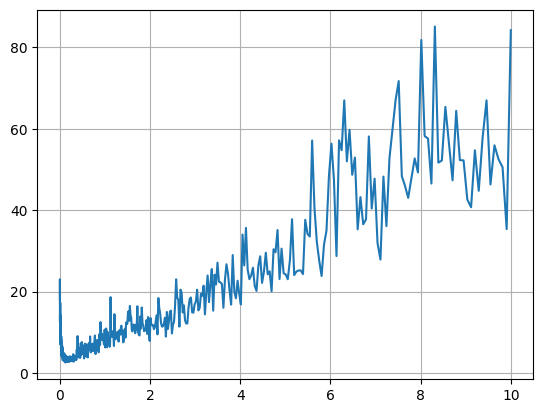

In [125]:
plt.plot(lrs, losst)
plt.grid(True)

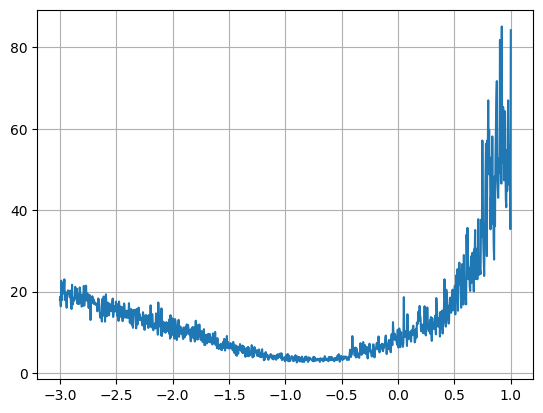

In [126]:
plt.plot(lre, losst)
plt.grid(True)

In [127]:

for t in range(1000):
    # mini-batch
    ix = torch.randint(0, X.shape[0], (32, ))

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    targets = Y[ix]
    loss = F.cross_entropy(logits, targets)
    # print(f"{loss.item() = }")
    
    # backward pass 
    for p in params:
        p.grad = None
    loss.backward()

    # update:
    lr = 0.01
    for p in params: 
        p.data -= lr * p.grad

    losst.append(loss.item())

print(f"{loss.item() = }")

loss.item() = 39.27223205566406


In [128]:
logits.max(1)

torch.return_types.max(
values=tensor([31.5919, 24.0496, 51.1065, 30.0448, 31.7441, 29.4829, 28.3705, 58.3165,
        22.6383, 28.3705, 55.8174, 67.5396, 29.5274, 35.4733, 31.7441, 28.3705,
        37.5499, 32.1085, 46.6718, 28.3705, 32.9127, 30.7941, 28.9955, 30.7823,
        30.5163, 37.9442, 44.1641, 28.3705, 41.9584, 35.6468, 28.3705, 42.9665],
       grad_fn=<MaxBackward0>),
indices=tensor([26, 22,  1,  8,  9,  0, 11,  0,  5, 11, 25,  0, 14,  8,  9, 11,  1, 20,
         1, 11,  5, 18, 15, 20, 22,  0,  9, 11,  0, 20, 11,  0]))

In [129]:
Y[:32]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

### evaluate loss on the whole data-set

In [130]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
targets = Y
loss = F.cross_entropy(logits, targets)
print(f"{loss.item() = }")

loss.item() = 36.235904693603516


# day03: 20240303


# The Whole Project

In [131]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from typing import List, Any
%matplotlib inline

### Constants

In [244]:
RANDOM_SEED = 10
NUM_BLOCKS = 3
NUM_DIM_CHARS = 2
NUM_HIDDEN = 20

### Random Generator

In [390]:
import random
import numpy as np

rand_gen = torch.Generator().manual_seed(RANDOM_SEED)
RAND_GEN = rand_gen

torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

### Read File

In [413]:
words = open("names.txt").read().splitlines()
len(words), words[:5]

(32033, ['emma', 'olivia', 'ava', 'isabella', 'sophia'])

### Make Mappings: `chr -> int` and `int -> chr`

In [247]:
ord("a"), ord("z"), ord("z") - ord("a") + 1, chr(ord("a")), chr(ord("z"))

(97, 122, 26, 'a', 'z')

In [248]:
itos = {i - ord("a") + 1: chr(i) for i in range(ord("a"), ord("z") + 1)}
itos[0] = "."

stoi = {s: i for i, s in itos.items()}

# stoi
# itos

### Get Data

In [417]:
def get_data(words: List[str], num_blocks: int = 3, stoi=stoi) -> (List[torch.tensor], List[torch.tensor]):
    """get data"""

    X, Y = [], []
    context = [0] * num_blocks
    
    for word in words:
        for ch in word + ".":
            i = stoi[ch]
            X.append(context)
            Y.append(i)
            context = context[1: ] + [i]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

In [250]:
num_blocks = NUM_BLOCKS
X, Y = get_data(words, num_blocks=num_blocks)

In [251]:
X[:10]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [13,  1,  0],
        [ 1,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22]])

In [252]:
Y[:10]

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9])

### Split Data: `train`, `val/dev`, and `test`

In [253]:
X.shape, X.shape[0]

(torch.Size([228146, 3]), 228146)

In [254]:
Y.shape, Y.shape[0]

(torch.Size([228146]), 228146)

In [255]:
indexes = torch.randperm(X.shape[0], generator=rand_gen)
indexes[:10]

tensor([117017,  81926, 152774,   8097, 220660,  38770, 226753, 147220, 224337,
        175417])

In [256]:
def split_data(X, y, split=0.8):
    
    """split data into train, val, and test sets"""
    
    assert X.shape[0] == y.shape[0], "input data X and Y sizes do not match."
    assert (0 < split and split < 1), "the split for training data should be within (0, 1)."
    
    len_data = X.shape[0]
    shuffled_indices = torch.randperm(X.shape[0], generator=rand_gen)

    len_train = int(split * len_data)
    len_val = (len_data - len_train) // 2
    len_test = len_data - len_train - len_val
    
    
    X_train = X[shuffled_indices][:len_train]
    X_val = X[shuffled_indices][len_train: len_train + len_val]
    X_test = X[shuffled_indices][- len_test:]
    
    y_train = Y[shuffled_indices][:len_train]
    y_val = Y[shuffled_indices][len_train: len_train + len_val]
    y_test = Y[shuffled_indices][- len_test:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [257]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)

In [258]:
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

(torch.Size([182516, 3]),
 torch.Size([22815, 3]),
 torch.Size([22815, 3]),
 torch.Size([182516]),
 torch.Size([22815]),
 torch.Size([22815]))

In [259]:
# just testing the previous:
ll = list(range(20))
ll

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [260]:
ll[:16], ll[16:16 + 2], ll[-2:]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [16, 17], [18, 19])

### Develop Model

- `C` is a mapping that translated `chars` into a `dim`-dimensional vector space;

In [261]:
len(stoi), len(itos)

(27, 27)

In [262]:
num_dim_chars = NUM_DIM_CHARS
num_classes = 27

assert num_classes == len(stoi), "check out `num_classes`"

C = torch.randn((num_classes, num_dim_chars), generator=rand_gen)
C

tensor([[ 0.2255,  0.5941],
        [-1.0222,  0.2909],
        [-1.2769, -1.8346],
        [-0.8331, -1.1707],
        [-0.1812,  0.4287],
        [ 1.1323, -1.2048],
        [ 0.2467, -0.4583],
        [-1.2280,  0.6647],
        [ 1.7504,  0.0408],
        [ 1.2616, -0.1174],
        [ 0.1276, -0.8659],
        [-1.6200, -1.2724],
        [ 0.6472, -0.5998],
        [-1.1100,  1.5252],
        [-0.6695, -2.2476],
        [-0.7635,  0.0614],
        [-1.5798,  1.1270],
        [-0.2605,  1.0821],
        [ 0.3168,  0.0166],
        [ 1.2904, -0.9054],
        [ 1.3610, -0.5850],
        [ 0.3172,  0.4392],
        [ 0.9316,  1.8759],
        [-0.5888,  0.6444],
        [ 0.1585, -0.0240],
        [-0.0537,  0.6226],
        [-1.0094,  1.5188]])

### Random Weights and Biases

In [263]:
input_dim = NUM_BLOCKS * NUM_DIM_CHARS
print(f"{input_dim = }")
X.view(-1, input_dim).shape

input_dim = 6


torch.Size([114073, 6])

In [264]:
len(X)

228146

In [373]:
num_hidden = NUM_HIDDEN

W1 = torch.randn((input_dim, num_hidden), generator=rand_gen)
b1 = torch.randn((num_hi, ), generator=rand_gen)

W2 = torch.randn((num_hidden, num_classes), generator=rand_gen)
b2 = torch.randn((num_classes, ), generator=rand_gen)

params = [C, W1, b1, W2, b2]

In [374]:
emb = C[X]
emb.shape, input_dim

(torch.Size([228146, 3, 2]), 6)

In [375]:
emb.view(-1, input_dim).shape

torch.Size([228146, 6])

In [376]:
(emb.view(-1, input_dim) @ W1).shape, b1.shape

(torch.Size([228146, 20]), torch.Size([20]))

In [377]:
h = torch.tanh(emb.view(-1, input_dim) @ W1 + b1)
h.shape

torch.Size([228146, 20])

In [378]:
logits = h @ W2 + b2
logits.shape

torch.Size([228146, 27])

In [379]:
targets = Y
targets.shape

torch.Size([228146])

In [380]:
loss = F.cross_entropy(logits, targets)
loss

tensor(10.3805, grad_fn=<NllLossBackward0>)

### Number of Params and to Set `requires_grad = True`

In [354]:
number_of_params = sum(p.nelement() for p in params)
print(f"{number_of_params = }")

number_of_params = 761


In [383]:
for p in params:
    p.requires_grad=True

### Training part

In [384]:
lrs = 1.0
isinstance(lrs, float)

True

In [338]:
def train(lrs, number_of_epochs):
    
    loss_hist = []
    
    for i in range(number_of_epochs):
        # forward pass
        emb = C[X_train]
        h = torch.tanh(emb.view(-1, input_dim) @ W1 + b1)
        logits = h @ W2 + b2
        targets = Y_train
        loss = F.cross_entropy(logits, targets)
        
        # backward pass
        for p in params:
            p.grad = None
            
        loss.backward()
        if i % 25 == 0:
          print(i, loss.item())

        if lrs is None:
            lr = 0.1
        if isinstance(lrs, float) or isinstance(lrs, int):
            lr = lrs
        else:
            lr = lrs[i]
        
        # update
        for p in params:
            p.data -= lr * p.grad
        
        # stats
        loss_hist.append(loss.item())
    
    return loss_hist
    


### Plots

In [358]:
number_of_epochs = 100
lrs = [1] * number_of_epochs
loss_hist = train(lrs, number_of_epochs)

0 8.547242164611816
25 3.0974955558776855
50 2.8555846214294434
75 2.720581293106079


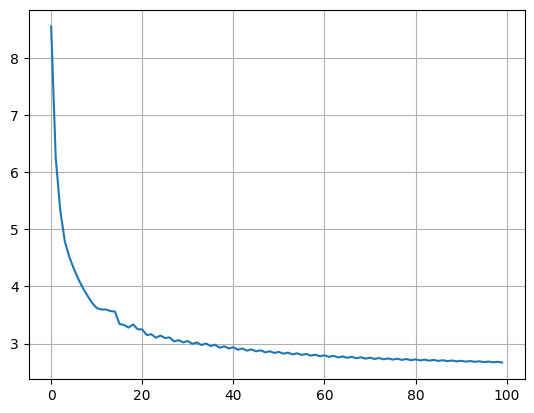

In [359]:
plt.plot(loss_hist)
plt.grid(True)

In [333]:
torch.linspace(0.001, 1, 1000)

lre = torch.linspace(-3, 1, 1000)
lrs = 10  ** lre

In [334]:
lrs[:10], lrs[-10:]

(tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011, 0.0011, 0.0011,
         0.0011]),
 tensor([ 9.2037,  9.2890,  9.3750,  9.4618,  9.5495,  9.6379,  9.7272,  9.8173,
          9.9082, 10.0000]))

In [335]:
number_of_epochs = 1000
loss_hist = train(lrs=lrs, number_of_epochs=number_of_epochs)

0 8.79713249206543
25 8.756515502929688
50 8.7059326171875
75 8.64311695098877
100 8.565389633178711
125 8.469647407531738
150 8.352381706237793
175 8.209808349609375
200 8.038166046142578
225 7.834354877471924
250 7.596701145172119
275 7.324915885925293
300 7.020214080810547
325 6.688879489898682
350 6.338000297546387
375 5.965630531311035
400 5.5699591636657715
425 5.1618523597717285
450 4.753571510314941
475 4.3613457679748535
500 4.009225845336914
525 3.7060706615448
550 3.4465343952178955
575 3.2328147888183594
600 3.0519330501556396
625 2.8988099098205566
650 2.77878999710083
675 2.6952004432678223
700 2.675415277481079
725 2.615123748779297
750 2.5824601650238037
775 2.556445837020874
800 2.549006700515747
825 2.5343830585479736
850 2.532332181930542
875 2.5635340213775635
900 2.6282765865325928
925 2.901202917098999
950 3.067002296447754
975 3.1173291206359863


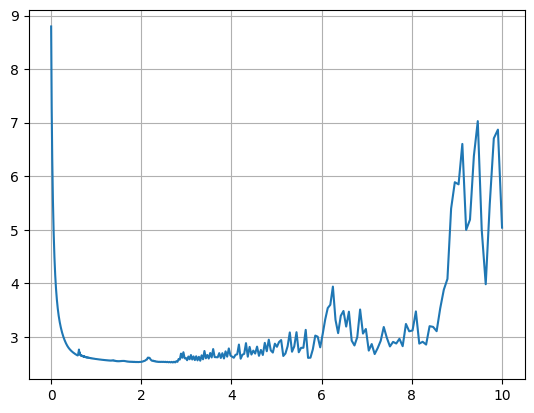

In [336]:
plt.plot(lrs, loss_hist)
plt.grid(True)

In [385]:
lrs = [1] * 100 + [0.1] * 100
number_of_epochs = len(lrs)
loss_hist = train(lrs, number_of_epochs)

0 10.164237976074219
25 2.860109567642212
50 2.7083396911621094
75 2.6274280548095703
100 2.576866626739502
125 2.563021659851074
150 2.560084104537964
175 2.557299852371216


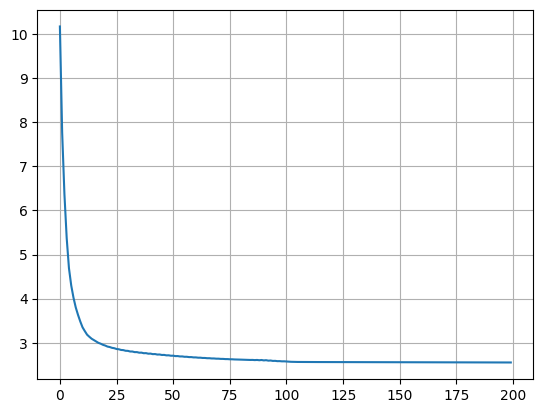

In [388]:
plt.plot(loss_hist)
plt.grid(True)

# Parametric model

In [414]:
def read_data(file_name):
    """read data and make corresponding mappings"""
    
    words = open(file_name).read().splitlines()
    print(len(words), words[:5])
    
    itos = {i - ord("a") + 1: chr(i) for i in range(ord("a"), ord("z") + 1)}
    itos[0] = "."
    stoi = {s: i for i, s in itos.items()}
    
    return words, itos, stoi
    

In [424]:
def model(
    num_blocks=NUM_BLOCKS,
    num_classes=27,
    num_dim_chars=NUM_DIM_CHARS,
    num_hidden=NUM_HIDDEN,
    rand_gen=RAND_GEN,
):


    assert num_classes == len(stoi), "check out `num_classes`"
    C = torch.randn((num_classes, num_dim_chars), generator=rand_gen)

    input_dim=NUM_BLOCKS * NUM_DIM_CHARS
    
    W1 = torch.randn((input_dim, num_hidden), generator=rand_gen)
    b1 = torch.randn((num_hidden, ), generator=rand_gen)
    
    W2 = torch.randn((num_hidden, num_classes), generator=rand_gen)
    b2 = torch.randn((num_classes, ), generator=rand_gen)
    
    params = [C, W1, b1, W2, b2]

    for p in params:
        p.requires_grad=True

    return params
    

In [425]:
def train_model(
    X_train, 
    Y_train, 
    lrs: List[float] = None, 
    number_of_epochs: int = 100,
) -> List[float]:

    # --------------------------------------------------------
    if lrs is None: 
        lrs = [0.1] * number_of_epochs
    else:
        assert len(lrs) == number_of_epochs, "len(lrs) and number_of_epochs do not match!"
    # --------------------------------------------------------

    
    loss_hist = []
    
    for i in range(number_of_epochs):
        # forward pass
        emb = C[X_train]
        h = torch.tanh(emb.view(-1, input_dim) @ W1 + b1)
        logits = h @ W2 + b2
        targets = Y_train
        loss = F.cross_entropy(logits, targets)
        
        # backward pass
        for p in params:
            p.grad = None
            
        loss.backward()
        if i % 25 == 0:
          print(i, loss.item())

        if lrs is None:
            lr = 0.1
        if isinstance(lrs, float) or isinstance(lrs, int):
            lr = lrs
        else:
            lr = lrs[i]
        
        # update
        for p in params:
            p.data -= lr * p.grad
        
        # stats
        loss_hist.append(loss.item())
    
    return loss_hist
    

### main:

In [426]:
words, itos, stoi = read_data(file_name="names.txt")
X, Y = get_data(words=words, num_blocks=NUM_BLOCKS, stoi=stoi)
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

32033 ['emma', 'olivia', 'ava', 'isabella', 'sophia']
torch.Size([182516, 3]) torch.Size([22815, 3]) torch.Size([22815, 3]) torch.Size([182516]) torch.Size([22815]) torch.Size([22815])


In [429]:
params = model(
    num_blocks=NUM_BLOCKS,
    num_classes=27,
    num_dim_chars=NUM_DIM_CHARS,
    num_hidden=NUM_HIDDEN,
    rand_gen=RAND_GEN,
)


In [505]:
class Model:
    def __init__(self, 
        num_blocks=NUM_BLOCKS,
        num_classes=27,
        num_dim_chars=NUM_DIM_CHARS,
        num_hidden=NUM_HIDDEN,
        rand_gen=RAND_GEN,
        name="model",
    ):
        self.num_blocks=num_blocks
        self.num_classes=num_classes
        self.num_dim_chars=num_dim_chars
        self.num_hidden=num_hidden
        self.rand_gen=rand_gen
       
        assert num_classes == len(stoi), "check out `num_classes`"
        self.C = torch.randn((num_classes, self.num_dim_chars), generator=self.rand_gen)
    
        self.input_dim = self.num_blocks * self.num_dim_chars
        print(f"{self.input_dim = }")
        
        self.W1 = torch.randn((self.input_dim, self.num_hidden), generator=self.rand_gen)
        self.b1 = torch.randn((self.num_hidden, ), generator=self.rand_gen)
        
        self.W2 = torch.randn((self.num_hidden, self.num_classes), generator=self.rand_gen)
        self.b2 = torch.randn((self.num_classes, ), generator=self.rand_gen)

       
        self.params = [self.C, self.W1, self.b1, self.W2, self.b2]
        for p in self.params:
            p.requires_grad = True
       
        
    def train(self, X_train, Y_train, lrs: List[float] = None, number_of_epochs: int = 100) -> List[float]:
        
        # --------------------------------------------------------
        if lrs is not None:
            number_of_epochs = len(lrs)
        if lrs is None: 
            lrs = [0.1] * number_of_epochs
        else:
            assert len(lrs) == number_of_epochs, "len(lrs) and number_of_epochs do not match!"
        # --------------------------------------------------------
        
        loss_hist = []
        
        for i in range(number_of_epochs):
            # forward pass
            emb = self.C[X_train]
            h = torch.tanh(emb.view(-1, self.input_dim) @ self.W1 + self.b1)
            logits = h @ self.W2 + self.b2
            targets = Y_train
            loss = F.cross_entropy(logits, targets)
            
            # backward pass
            for p in self.params:
                p.grad = None
                
            loss.backward()
            if i % 25 == 0:
              print(i, loss.item())
    
            # update
            for p in self.params:
                p.data -= lr * p.grad
            
            # stats
            loss_hist.append(loss.item())
        
        return loss_hist


In [506]:
_model = Model()

self.input_dim = 6


In [507]:
loss_hist = _model.train(X_train, Y_train)

0 8.621232986450195
25 3.0328922271728516
50 2.7521798610687256
75 2.656184673309326


torch.Size([182516, 3]) torch.Size([22815, 3]) torch.Size([22815, 3]) torch.Size([182516]) torch.Size([22815]) torch.Size([22815])
--------------------------------------------------------------------------------
name = 'model_3_2_50'
self.input_dim = 6
0 11.543813705444336
25 4.3790435791015625
50 3.0263302326202393
75 2.8794591426849365
100 2.8183352947235107
125 2.937096357345581
150 2.698085069656372
175 2.6962249279022217


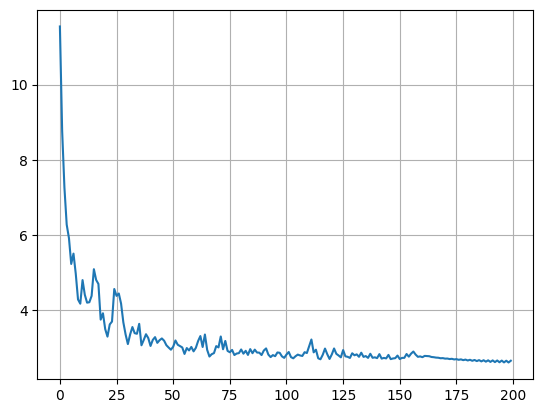

name = 'model_3_2_100'
self.input_dim = 6
0 16.55815315246582
25 4.54035758972168
50 3.778797149658203
75 3.442957639694214
100 2.9378926753997803
125 3.2803337574005127
150 2.959569215774536
175 2.809126377105713


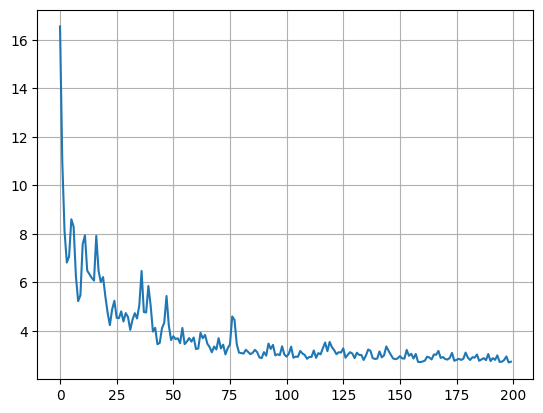

name = 'model_3_5_50'
self.input_dim = 15
0 14.493865013122559
25 4.125863075256348
50 3.2902793884277344
75 3.000216007232666
100 2.8294811248779297
125 2.7597742080688477
150 2.7140347957611084
175 2.6514852046966553


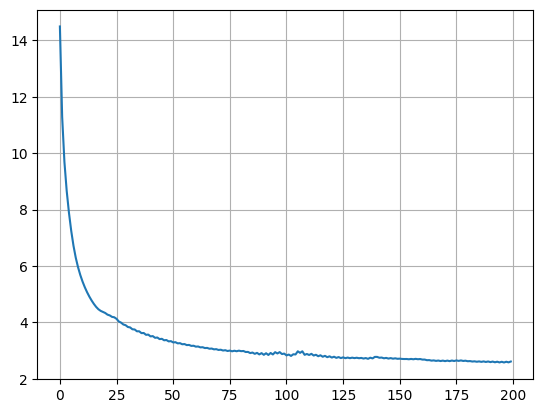

name = 'model_3_5_100'
self.input_dim = 15
0 17.136322021484375
25 4.663390159606934
50 4.460869789123535
75 3.699572801589966
100 3.1568009853363037
125 2.904435396194458
150 2.934034824371338
175 2.9768311977386475


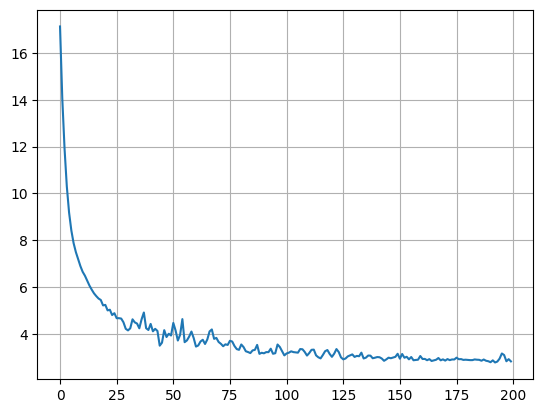

torch.Size([182516, 5]) torch.Size([22815, 5]) torch.Size([22815, 5]) torch.Size([182516]) torch.Size([22815]) torch.Size([22815])
--------------------------------------------------------------------------------
name = 'model_5_2_50'
self.input_dim = 10
0 13.25373363494873
25 3.8957433700561523
50 3.0532233715057373
75 2.884453535079956
100 2.7827932834625244
125 2.7304210662841797
150 2.7551848888397217
175 2.8177688121795654


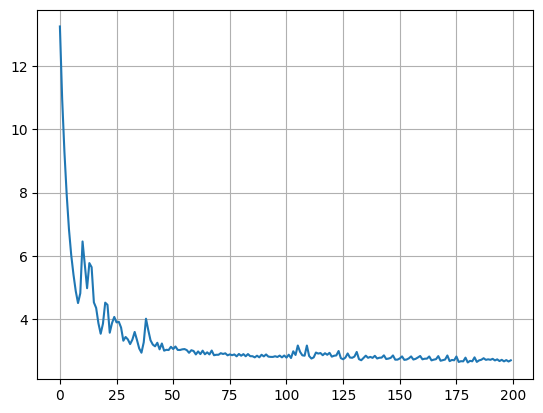

name = 'model_5_2_100'
self.input_dim = 10
0 16.668127059936523
25 5.090176105499268
50 4.035582065582275
75 3.196035861968994
100 3.364212989807129
125 3.11667537689209
150 2.83215069770813
175 2.695844888687134


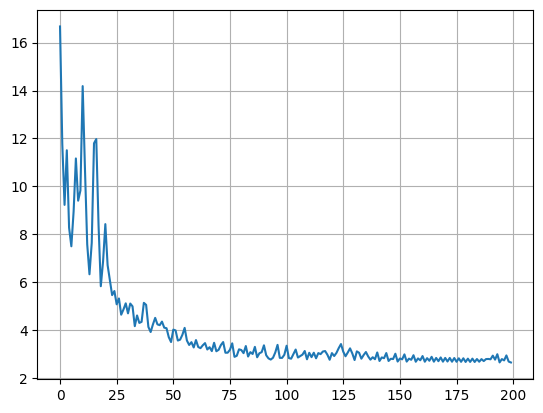

name = 'model_5_5_50'
self.input_dim = 25
0 12.847245216369629
25 3.591946840286255
50 3.0849852561950684
75 2.9596214294433594
100 3.005035161972046
125 2.771664619445801
150 2.8641819953918457
175 2.7339420318603516


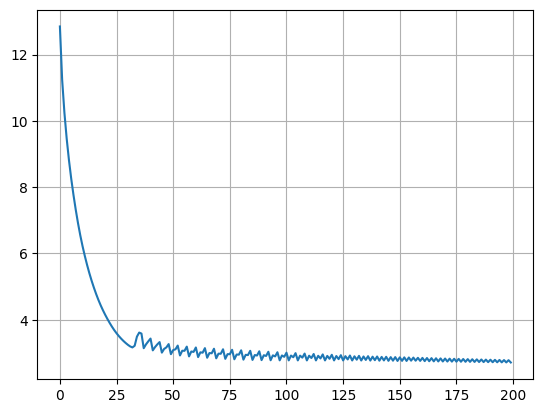

name = 'model_5_5_100'
self.input_dim = 25
0 19.70775032043457
25 5.781362533569336
50 5.803593158721924
75 4.6440815925598145
100 3.8981661796569824
125 4.240657806396484
150 4.002954959869385
175 3.580040216445923


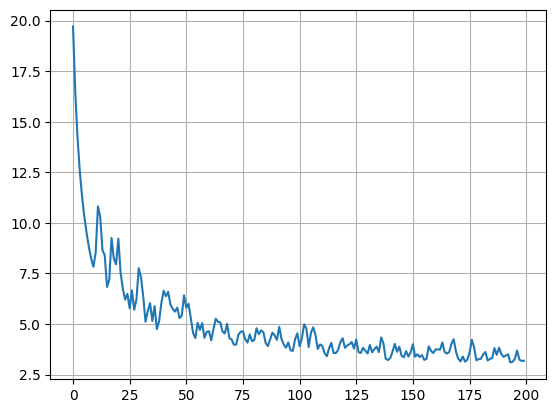

torch.Size([182516, 10]) torch.Size([22815, 10]) torch.Size([22815, 10]) torch.Size([182516]) torch.Size([22815]) torch.Size([22815])
--------------------------------------------------------------------------------
name = 'model_10_2_50'
self.input_dim = 20
0 12.894439697265625
25 5.8585968017578125
50 5.243792533874512
75 4.065040111541748
100 3.4716479778289795
125 3.4184377193450928
150 2.9427037239074707
175 2.7255871295928955


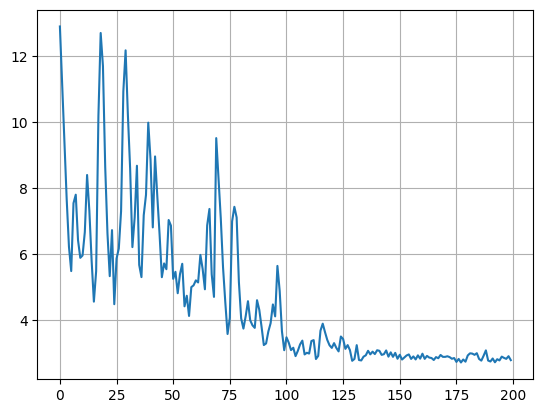

name = 'model_10_2_100'
self.input_dim = 20
0 17.444795608520508
25 7.894867420196533
50 10.607250213623047
75 4.673288822174072
100 6.401421546936035
125 5.211498737335205
150 3.7071359157562256
175 3.1780853271484375


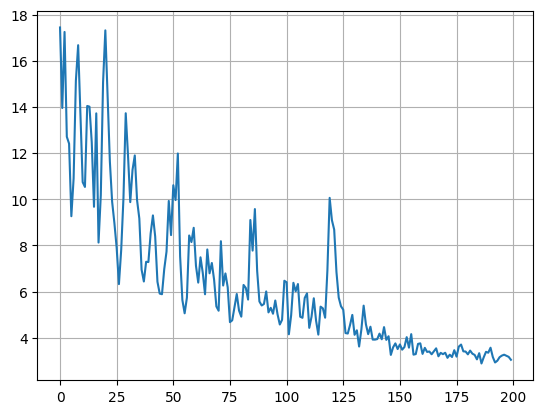

name = 'model_10_5_50'
self.input_dim = 50
0 13.414631843566895
25 5.1194071769714355
50 5.540990352630615
75 3.959367275238037
100 2.9701015949249268
125 3.9495346546173096
150 3.0710396766662598
175 3.721010684967041


In [ ]:
dict_models = {}

for num_blocks in [3, 5, 10]:
    print("=" * 80)
    X, Y = get_data(words=words, num_blocks=num_blocks, stoi=stoi)
    X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)
    print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
    print("-" * 80)
    
    for num_dim_chars in [2, 5]:
        for num_hidden in [50, 100]:
            name=f"model_{num_blocks}_{num_dim_chars}_{num_hidden}"
            print(f"{name = }")
            model = Model( 
                num_blocks=num_blocks,
                num_dim_chars=num_dim_chars,
                num_hidden=num_hidden,
                name=name,
            )
            loss_hist = model.train(X_train, Y_train, lrs=[1] * 100 + [0.1] * 100)
            plt.plot(loss_hist)
            plt.grid(True)
            plt.show()
            dict_models[name] = model
            